In [1]:
#création de la structure et du fichier cif a partir de materials project
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
api_key = "JmzD7RNxhb8WTdxuZdy"
mat_id = "mp-3613"
with MPRester(api_key) as m:
    s = m.get_structure_by_material_id(mat_id)
    new_s=SpacegroupAnalyzer(s).get_primitive_standard_structure()
    f = CifWriter(new_s)
    f.write_file('cristal.cif')

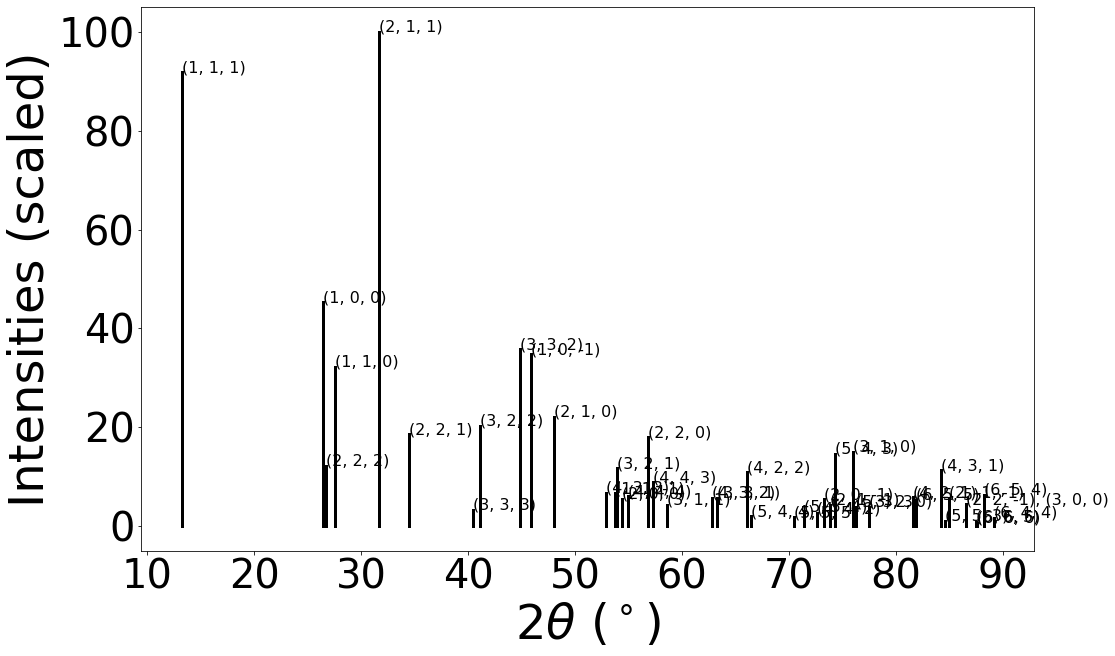

In [9]:
#Obtention et affichage de tous les pics du diffractogramme
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from tabulate import tabulate
xrd_calc = XRDCalculator(wavelength = 1.54060)
diff_pattern = xrd_calc.get_pattern(new_s, scaled=True) # scaled=True donc les intensités sont mises à échelle de 0 à 100
xrd_calc.show_plot(new_s)


In [13]:
#Obtention des paramètres des trois premiers pics : positions 1, 2, 3
positions = [0,1,2]
j = 1

for i in positions: 
    print("pic de diffraction",j, " : 2\u03B8 (degrés) = ", diff_pattern.x[i])
    print("hkl = ", diff_pattern.hkls[i][0]['hkl'])
    print("Intensité (mise à échelle sur 100) = ", diff_pattern.y[i])
    print('\n')
    print('------------------------------')
    print('\n')
    j = j+1


pic de diffraction 1  : 2θ (degrés) =  13.245776326142673
hkl =  (1, 1, 1)
Intensité (mise à échelle sur 100) =  91.87608293741714


------------------------------


pic de diffraction 2  : 2θ (degrés) =  26.407048159111238
hkl =  (1, 0, 0)
Intensité (mise à échelle sur 100) =  45.29582680706801


------------------------------


pic de diffraction 3  : 2θ (degrés) =  26.67279815212425
hkl =  (2, 2, 2)
Intensité (mise à échelle sur 100) =  12.167459234397427


------------------------------


